# Client orders :: *ipynb solution draft* <br>

## Read Data

In [1]:
# Import libraries

import order_functions as of

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

from collections import defaultdict

from scipy.stats import boxcox
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read data / Clean version of sales_data.csv

df = pd.read_csv("sales_data_clean.csv")
df.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,1396-10-26,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,1394-04-21,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,1402-05-24,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,1397-06-17,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,1392-09-30,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


In [3]:
df = of.convert_shamsi_to_datetime(df, "Order_Date")
df.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,2018-01-16,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,2015-07-12,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,2023-08-15,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,2018-09-08,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,2013-12-21,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


---

## Client Order #5

از آنجا که شرکت مدت زیادی را دور از بازار بوده و در این مدت قیمت‌ها ثباتی نداشته‌اند، از شما خواسته شده تا راهکاری را ارائه دهید تا با داشتن مشخصات فنی یک لپ‌تاپ بتوان قیمت آن را در بازار پیش‌بینی کند.

In [4]:
df.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,2018-01-16,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,2015-07-12,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,2023-08-15,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,2018-09-08,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,2013-12-21,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


In [5]:
df.columns

Index(['Order_ID', 'Branch', 'Order_Date', 'Order_Priority', 'Manufacturer',
       'Model_Name', 'Category', 'Screen_Size', 'RAM', 'OS', 'OS_Version',
       'Weight', 'Price', 'Quantity', 'Discount', 'Total_Price', 'Profit',
       'Ship_Duration', 'Screen_Type', 'Screen_resolution', 'CPU_Brand',
       'CPU_Model', 'CPU_GHZ', 'Storage_SSD', 'Storage_HDD', 'Storage_Hybrid',
       'Storage_Flash', 'Storage_Total', 'GPU_Brand', 'GPU_Model', 'Rating',
       'Store'],
      dtype='object')

In [6]:
# Filter columns needed for analysis and create a new dataframe

cols_for_analyze_5 = [
    "Order_Date",
    "Manufacturer",
    "Category",
    "Screen_Size", "Screen_resolution",
    "RAM",
    "OS",
    "Weight",
    "CPU_Brand", "CPU_Model", "CPU_GHZ",
    "Storage_SSD", "Storage_HDD", "Storage_Hybrid", "Storage_Flash", "Storage_Total",
    "GPU_Brand", "GPU_Model",
    "Price",
]
df5 = df[cols_for_analyze_5].copy()

df5.head()

,Order_Date,Manufacturer,Category,Screen_Size,Screen_resolution,RAM,OS,Weight,CPU_Brand,CPU_Model,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Price
0,2018-01-16,Dell,Notebook,15.6,1920x1080,8,Windows,2.18,Intel,Core i5 7200U,2.5,256,0,0,0,256,AMD,Radeon R5 M420,3450000
1,2015-07-12,Lenovo,2 in 1 Convertible,13.3,1920x1080,8,Windows,1.30,Intel,Core i5 7200U,2.5,256,0,0,0,256,Intel,HD Graphics 620,3400000
2,2023-08-15,Lenovo,Notebook,15.6,1920x1080,8,Windows,2.60,Intel,Core i7 6700HQ,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,44900000
3,2018-09-08,Dell,Ultrabook,13.3,1920x1080,8,Windows,1.40,Intel,Core i7 8550U,1.8,256,0,0,0,256,AMD,Radeon 530,12550000
4,2013-12-21,Acer,Notebook,15.6,1920x1080,4,Windows,2.23,Intel,Core i5 7200U,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,2050000


In [7]:
dfe = pd.read_csv('laptop_data.csv')
dfe.head()

,Unnamed: 0,Device Type,Weight,Screen Size,Screen Type,Screen Resolution,Processor Manufacturer,Processor Series,Processor Model,Processor Cache Memory,...,Battery Life,Operating System,RAM Frequency,Battery Cell Count,manufacturer,Model,org_price,Discount Percent,store,exist
0,0,نوت بوک (لپ تاپ),1.900,15.0,PixelSense™ Display,2160 * 3840,INTEL,Core i7,8650U,8.0,...,17.0,Microsoft Windows 10,NaN,NaN,microsoft,surface-book-2,66800000.0,1.5,meghdad,exist
1,1,نوت بوک (لپ تاپ),1.530,13.5,PixelSense™ Display,2000 * 3000,INTEL,Core i7,8650U,8.0,...,17.0,Microsoft Windows 10,NaN,NaN,microsoft,surface-book-2,55812000.0,0.7,meghdad,exist
2,2,نوت بوک (لپ تاپ),1.200,13.5,PixelSense™ Display,2256 * 1504,INTEL,Core i5,1035G7,6.0,...,14.0,Microsoft Windows 10,NaN,NaN,microsoft,surface-laptop-3-b,40000000.0,2.4,meghdad,exist
3,3,نوت بوک (لپ تاپ),1.534,13.5,PixelSense™ Display,2000 * 3000,INTEL,Core i7,1065 G7,8.0,...,15.0,Microsoft Windows 10,NaN,NaN,microsoft,surface-book-3,60500000.0,1.6,meghdad,exist
4,4,نوت بوک (لپ تاپ),1.200,13.5,PixelSense™ Display,2256 * 1504,INTEL,Core i5,1035G7,6.0,...,14.0,Microsoft Windows 10,NaN,NaN,microsoft,surface-laptop-3-a,36288000.0,2.7,meghdad,exist


In [8]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10122 non-null  int64  
 1   Device Type                 7622 non-null   object 
 2   Weight                      7876 non-null   float64
 3   Screen Size                 8122 non-null   float64
 4   Screen Type                 9075 non-null   object 
 5   Screen Resolution           8058 non-null   object 
 6   Processor Manufacturer      10115 non-null  object 
 7   Processor Series            9881 non-null   object 
 8   Processor Model             9663 non-null   object 
 9   Processor Cache Memory      8680 non-null   float64
 10  Processor Frequency         6403 non-null   float64
 11  RAM Type                    9947 non-null   object 
 12  RAM Memory                  10120 non-null  float64
 13  Internal Memory Capacity    812

In [9]:
dfe.isnull().sum()

Unnamed: 0                       0
Device Type                   2500
Weight                        2246
Screen Size                   2000
Screen Type                   1047
Screen Resolution             2064
Processor Manufacturer           7
Processor Series               241
Processor Model                459
Processor Cache Memory        1442
Processor Frequency           3719
RAM Type                       175
RAM Memory                       2
Internal Memory Capacity      2002
Internal Memory Type            14
Graphics Card Manufacturer      19
Graphics Card Model            203
Dedicated Graphics Memory     4026
Battery Life                  7271
Operating System              4048
RAM Frequency                 8921
Battery Cell Count            3284
manufacturer                  1489
Model                         1744
org_price                     8942
Discount Percent              9678
store                            0
exist                            0
dtype: int64

In [10]:
dfe = of.preprocess_competitors(dfe)
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 443
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weight                    298 non-null    float64
 1   Screen_Size               298 non-null    float64
 2   CPU_Brand                 298 non-null    object 
 3   CPU_GHZ                   298 non-null    float64
 4   RAM                       298 non-null    int64  
 5   GPU_Brand                 298 non-null    object 
 6   GPU_Model                 298 non-null    object 
 7   OS                        298 non-null    object 
 8   Manufacturer              298 non-null    object 
 9   Price                     298 non-null    float64
 10  Category                  298 non-null    object 
 11  Screen_resolution_width   298 non-null    int64  
 12  Screen_resolution_height  298 non-null    int64  
 13  CPU_Model                 298 non-null    object 
 14  Storage_SSD    

In [11]:
# convert Screen_resolution to Screen_resolution_width and Screen_resolution_height

df5["Screen_resolution_width"] = df5["Screen_resolution"].str.split("x").str[0].astype(int)
df5["Screen_resolution_height"] = df5["Screen_resolution"].str.split("x").str[1].astype(int)
df5.drop("Screen_resolution", axis=1, inplace=True)
# df5.drop("Screen_resolution_height", axis=1, inplace=True)  # high correlation with Screen_resolution_width
df5.head()

,Order_Date,Manufacturer,Category,Screen_Size,RAM,OS,Weight,CPU_Brand,CPU_Model,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Price,Screen_resolution_width,Screen_resolution_height
0,2018-01-16,Dell,Notebook,15.6,8,Windows,2.18,Intel,Core i5 7200U,2.5,256,0,0,0,256,AMD,Radeon R5 M420,3450000,1920,1080
1,2015-07-12,Lenovo,2 in 1 Convertible,13.3,8,Windows,1.30,Intel,Core i5 7200U,2.5,256,0,0,0,256,Intel,HD Graphics 620,3400000,1920,1080
2,2023-08-15,Lenovo,Notebook,15.6,8,Windows,2.60,Intel,Core i7 6700HQ,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,44900000,1920,1080
3,2018-09-08,Dell,Ultrabook,13.3,8,Windows,1.40,Intel,Core i7 8550U,1.8,256,0,0,0,256,AMD,Radeon 530,12550000,1920,1080
4,2013-12-21,Acer,Notebook,15.6,4,Windows,2.23,Intel,Core i5 7200U,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,2050000,1920,1080


In [12]:
df5.dropna(subset=['CPU_Brand', 'CPU_Model', 'CPU_GHZ'], inplace=True)

In [13]:
# Add column 'Year' & drop column 'Order_Date'

df5["Year"] = df5["Order_Date"].dt.year
df5.drop("Order_Date", axis=1, inplace=True)

### CPI :: Consumer Price Index
The CPI is an index that measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.<br>
It is one of the most widely used statistics for identifying periods of inflation or deflation.



Consumer Price Index for Islamic Republic of Iran   <br>
Source 1: https://fred.stlouisfed.org/series/DDOE01IRA086NWDB   <br>
Source 2: https://ycharts.com/indicators/iran_consumer_price_index_wdi  <br>
Source 3: https://tradingeconomics.com/iran/consumer-price-index-cpi    <br>

In [14]:
# Update prices based on CPI (Consumer Price Index) values

cpi_values = {
    2010: 106.52,
    2011: 130.086,
    2012: 177.219,
    2013: 229.694,
    2014: 268.342,
    2015: 293.48,
    2016: 319.56,
    2017: 351.61,
    2018: 393.78,
    2019: 550.93,
    2020: 719.48,
    2021: 1031.66,
    2022: 1211.5619,
    2023: 2144.3869,
}

df5["Price_Adjusted"] = df5.apply(
    lambda row: row["Price"] * (cpi_values[2023] / cpi_values[row["Year"]]), axis=1
)
df_adjusted_prices = df5[["Year", "Price", "Price_Adjusted"]]
df5.drop("Price", axis=1, inplace=True)
df5.rename(columns={"Price_Adjusted": "Price"}, inplace=True)
df5.drop("Year", axis=1, inplace=True)

df5.head()

,Manufacturer,Category,Screen_Size,RAM,OS,Weight,CPU_Brand,CPU_Model,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Screen_resolution_width,Screen_resolution_height,Price
0,Dell,Notebook,15.6,8,Windows,2.18,Intel,Core i5 7200U,2.5,256,0,0,0,256,AMD,Radeon R5 M420,1920,1080,1.878748e+07
1,Lenovo,2 in 1 Convertible,13.3,8,Windows,1.30,Intel,Core i5 7200U,2.5,256,0,0,0,256,Intel,HD Graphics 620,1920,1080,2.484297e+07
2,Lenovo,Notebook,15.6,8,Windows,2.60,Intel,Core i7 6700HQ,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,1920,1080,4.490000e+07
3,Dell,Ultrabook,13.3,8,Windows,1.40,Intel,Core i7 8550U,1.8,256,0,0,0,256,AMD,Radeon 530,1920,1080,6.834287e+07
4,Acer,Notebook,15.6,4,Windows,2.23,Intel,Core i5 7200U,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,1920,1080,1.913848e+07


In [15]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 443
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weight                    298 non-null    float64
 1   Screen_Size               298 non-null    float64
 2   CPU_Brand                 298 non-null    object 
 3   CPU_GHZ                   298 non-null    float64
 4   RAM                       298 non-null    int64  
 5   GPU_Brand                 298 non-null    object 
 6   GPU_Model                 298 non-null    object 
 7   OS                        298 non-null    object 
 8   Manufacturer              298 non-null    object 
 9   Price                     298 non-null    float64
 10  Category                  298 non-null    object 
 11  Screen_resolution_width   298 non-null    int64  
 12  Screen_resolution_height  298 non-null    int64  
 13  CPU_Model                 298 non-null    object 
 14  Storage_SSD    

In [16]:
dfe = dfe[df5.columns]
df_records = pd.concat([df5, dfe], ignore_index=True)

CPU Ranking Rationale:
- Cortex, E-Series, and Atom models are ranked as the least powerful.
- Celeron and Pentium models are ranked next.
- Core M and some AMD series like A4, A6, A8, A9, A10, and A12 follow.
- Xeon, FX, and Ryzen models are ranked higher.
- Core i3, Core i5, and Core i7 models are ranked in ascending order of their power, and within each series, they are ranked by their generation and model number.

In [17]:
cpu_list = df_records["CPU_Model"].unique()

def rank_cpu(cpu_model):
    if not cpu_model or isinstance(cpu_model, float):
        return float('inf')  # Assign the highest rank for None or NaN values
    
    score = 0
    if "i9" in cpu_model:
        score += 9000
    elif "i7" in cpu_model:
        score += 7000
    elif "i5" in cpu_model:
        score += 5000
    elif "i3" in cpu_model:
        score += 3000
    elif "Xeon" in cpu_model:
        score += 8000
    elif "Ryzen 9" in cpu_model:
        score += 9000
    elif "Ryzen 7" in cpu_model:
        score += 7000
    elif "Ryzen 5" in cpu_model:
        score += 5000
    elif "Ryzen" in cpu_model:
        score += 4000
    elif "A12" in cpu_model or "A10" in cpu_model:
        score += 1000
    elif "A8" or "A9" in cpu_model:
        score += 800
    elif "A6" or "A4" in cpu_model:
        score += 600
    elif "FX" in cpu_model:
        score += 2000
    elif "Pentium" in cpu_model:
        score += 2000
    elif "Celeron" in cpu_model:
        score += 1000
    elif "Atom" in cpu_model:
        score += 500
    elif "Core M" in cpu_model:
        score += 2500
    elif "E-Series" in cpu_model:
        score += 700
    else:
        score += 0  # Unknown or other CPUs
    
    try:
        generation = [int(s) for s in cpu_model.split() if s.isdigit()][0]
        score += generation
    except:
        pass  # No generation number found
    
    return score

cpu_ranks = defaultdict(int)
for cpu in set(cpu_list):  # Use set to remove duplicates
    cpu_ranks[cpu] = rank_cpu(cpu)

sorted_cpus = sorted(cpu_ranks.items(), key=lambda x: x[1])

cpu_ranking_dict = {cpu: rank+1 for rank, (cpu, _) in enumerate(sorted_cpus)}

df_records["CPU_Model"] = df_records["CPU_Model"].apply(lambda x: cpu_ranking_dict[x])
df_records['CPU_Model'].value_counts()

CPU_Model
51     200242
83     123235
86      97516
69      86008
97      82621
        ...  
43          2
44          1
117         1
74          1
98          1
Name: count, Length: 121, dtype: int64

In [18]:
# # Order CPU models by performance
# # Create a dictionary of CPU models and their rank
# # Map the rank to CPU_Model column

# cpu_list = df5["CPU_Model"].unique()

# sorted_cpus = sorted(
#     cpu_list,
#     key=lambda x: (
#         -1
#         if "Core i7" in str(x)
#         else -2
#         if "Core i5" in str(x)
#         else -3
#         if "Core i3" in str(x)
#         else -4
#         if "Ryzen" in str(x) or "FX" in str(x)
#         else -5
#         if "Xeon" in str(x)
#         else -6
#         if "A12-Series" in str(x) or "A10-Series" in str(x)
#         else -7
#         if "A9-Series" in str(x)
#         or "A8-Series" in str(x)
#         or "A6-Series" in str(x)
#         or "A4-Series" in str(x)
#         else -8
#         if "Core M" in str(x)
#         else -9
#         if "Pentium" in str(x)
#         else -10
#         if "Celeron" in str(x)
#         else -11
#         if "Atom" in str(x)
#         else -12
#         if "E-Series" in str(x)
#         else -13,  # For others or NaN values
#         str(x),  # To sort by name within the same category
#     ),
# )

# cpu_rank = {cpu: rank + 1 for rank, cpu in enumerate(sorted_cpus)}

# df5["CPU_Model"] = df5["CPU_Model"].map(cpu_rank)
# dfe['CPU_Model'] = dfe['CPU_Model'].map(cpu_rank)

# df5["CPU_Model"].value_counts()

In [19]:
df_records.isnull().sum()

Manufacturer                0
Category                    0
Screen_Size                 0
RAM                         0
OS                          0
Weight                      0
CPU_Brand                   0
CPU_Model                   0
CPU_GHZ                     0
Storage_SSD                 0
Storage_HDD                 0
Storage_Hybrid              0
Storage_Flash               0
Storage_Total               0
GPU_Brand                   0
GPU_Model                   0
Screen_resolution_width     0
Screen_resolution_height    0
Price                       0
dtype: int64

In [20]:
# # Fill Null values in 'CPU_GHZ' and 'CPU_Brand' columns,
# # with the most frequent value for each manufacturer

# def fill_cpu_mode(group, column_name):
#     mode_value = group[column_name].mode().iloc[0]
#     return group.fillna({column_name: mode_value})

# df5 = df5.groupby("Manufacturer").apply(fill_cpu_mode, "CPU_GHZ").reset_index(drop=True)
# df5 = df5.groupby("Manufacturer").apply(fill_cpu_mode, "CPU_Brand").reset_index(drop=True)
# df5 = df5.groupby("Manufacturer").apply(fill_cpu_mode, "CPU_Model").reset_index(drop=True)

# df5.head()

In [21]:
gpu_list = df_records["GPU_Model"].unique()
gpu_list

array(['Radeon R5 M420', 'HD Graphics 620', 'GeForce GTX 960M',
       'Radeon 530', 'GeForce 940MX', 'Radeon R9 M385', 'GeForce 920MX',
       'FirePro W5130M', 'GeForce GTX 1050', 'UHD Graphics 620',
       'HD Graphics 520', 'HD Graphics 500', 'HD Graphics 615',
       'GeForce GT 940MX', 'GeForce 150MX', 'HD Graphics 620 ',
       'Radeon R5 M330', 'Radeon R5 M420X', 'GeForce GTX 960',
       'Radeon R7 M445', 'GeForce GTX 1060', 'Quadro M2200M',
       'Radeon RX 580', 'Radeon R5', 'HD Graphics 5300', 'Radeon 540',
       'Radeon R7 M460', 'GeForce 930MX ', 'GeForce 930M',
       'GeForce MX150', 'GeForce GTX 1050 Ti', 'GeForce GTX 950M',
       'GeForce GTX 980M', 'GeForce 940M', 'GeForce 930MX',
       'GeForce GTX 940M', 'GeForce GTX1060', 'GeForce GTX 1050M',
       'HD Graphics 405', 'HD Graphics 505', 'Radeon R5 M430',
       'HD Graphics 400', 'GeForce GTX 960<U+039C>', 'HD Graphics 6000',
       'GeForce 920M', 'HD Graphics', 'Radeon R7 M365X',
       'Iris Pro Graphics', 

In [22]:
# Define a function to rank GPUs based on the given information

def rank_gpu(gpu_model):
    if not gpu_model or isinstance(gpu_model, float):
        return float('inf')  # Assign the highest rank for None or NaN values
    
    score = 0
    if "RTX" in gpu_model:
        score += 9000
    elif "GTX" in gpu_model:
        score += 8000
    elif "MX" in gpu_model:
        score += 4000
    elif "Radeon RX" in gpu_model:
        score += 7000
    elif "Radeon R7" in gpu_model:
        score += 3000
    elif "Radeon R5" in gpu_model:
        score += 2000
    elif "Radeon R4" in gpu_model or "Radeon R3" in gpu_model:
        score += 1000
    elif "Iris Plus" in gpu_model or "Iris Pro" in gpu_model:
        score += 3500
    elif "Iris" in gpu_model:
        score += 3200
    elif "UHD" in gpu_model or "HD Graphics" in gpu_model:
        score += 3000
    elif "Quadro" in gpu_model:
        score += 8500
    elif "FirePro" in gpu_model:
        score += 8100
    else:
        score += 0  # Unknown or other GPUs
    
    try:
        generation = [int(s) for s in gpu_model.split() if s.isdigit()][0]
        score += generation
    except:
        pass  # No generation number found
    
    if "Ti" in gpu_model:
        score += 500
    if "M" in gpu_model:
        score -= 100
    
    return score

gpu_ranks = defaultdict(int)
for gpu in set(gpu_list):  # Use set to remove duplicates
    gpu_ranks[gpu] = rank_gpu(gpu)

sorted_gpus = sorted(gpu_ranks.items(), key=lambda x: x[1])

# Create a dictionary of GPUs and their rank
gpu_ranking_dict = {gpu: rank+1 for rank, (gpu, _) in enumerate(sorted_gpus)}

df_records["GPU_Model"] = df_records["GPU_Model"].apply(lambda x: gpu_ranking_dict[x])
df_records['GPU_Model'].value_counts()

GPU_Model
70     243521
64     117431
143     76205
69      70777
19      48394
        ...  
151         1
50          1
138         1
144         1
135         1
Name: count, Length: 163, dtype: int64

GPU Ranking Rationale:
- GPU Series: For example, NVIDIA's GeForce GTX 1080 would typically be more powerful than a GeForce GTX 1070, and so on.
- GPU Brand: NVIDIA's GTX and RTX series are often considered high-end, whereas their MX series targets the mid-range market.<br>
    Similarly, AMD's Radeon RX series can be high-end, while their Radeon R series might be considered mid to low-end.
- Integrated vs. Dedicated: Integrated graphics like Intel's HD Graphics or Iris Graphics are typically less powerful than dedicated GPUs.
- Memory and Clock Speed: Higher memory and faster clock speeds can offer better performance, but these specifics aren't provided in the list.

In [23]:
# # Order GPU models by performance
# # Create a dictionary of GPU models and their rank
# # Map the rank to GPU_Model column

# gpu_list = df5["GPU_Model"].unique()

# sorted_gpus = sorted(
#     gpu_list,
#     key=lambda x: (
#         -1
#         if "GeForce GTX 1080" in str(x)
#         else -2
#         if "GeForce GTX 1070" in str(x)
#         else -3
#         if "GeForce GTX 1060" in str(x)
#         else -4
#         if "GeForce GTX 1050" in str(x)
#         else -5
#         if "GeForce GTX 980" in str(x)
#         else -6
#         if "Radeon RX 580" in str(x) or "Radeon RX 560" in str(x)
#         else -7
#         if "Quadro" in str(x)
#         else -8
#         if "GeForce GTX 9" in str(x) or "GeForce MX" in str(x)
#         else -9
#         if "Radeon R9" in str(x) or "Radeon R7" in str(x)
#         else -10
#         if "Radeon R5" in str(x)
#         else -11
#         if "Iris" in str(x)
#         else -12
#         if "HD Graphics" in str(x) or "UHD Graphics" in str(x)
#         else -13
#         if "FirePro" in str(x)
#         else -14
#         if "GeForce 9" in str(x)
#         else -15,  # For other GPUs or NaN values
#         str(x),  # To sort by name within the same category
#     ),
# )

# gpu_rank = {gpu: rank + 1 for rank, gpu in enumerate(sorted_gpus)}

# df5["GPU_Model"] = df5["GPU_Model"].map(gpu_rank)
# dfe['GPU_Model'] = dfe['GPU_Model'].map(gpu_rank)

# df5["GPU_Model"].value_counts()

In [24]:
# Label Encoding for categorical columns

categorical_cols = [
    "Manufacturer",
    "Category",
    "OS",
    "CPU_Brand",
    "GPU_Brand",
]

le_manufacturer = LabelEncoder()
df_records["Manufacturer"] = le_manufacturer.fit_transform(df_records["Manufacturer"])
manufacturer_mapping = dict(
    zip(le_manufacturer.classes_, le_manufacturer.transform(le_manufacturer.classes_))
)

le_category = LabelEncoder()
df_records["Category"] = le_category.fit_transform(df_records["Category"])
category_mapping = dict(
    zip(le_category.classes_, le_category.transform(le_category.classes_))
)

le_os = LabelEncoder()
df_records["OS"] = le_os.fit_transform(df_records["OS"])
os_mapping = dict(zip(le_os.classes_, le_os.transform(le_os.classes_)))

le_cpu_brand = LabelEncoder()
df_records["CPU_Brand"] = le_cpu_brand.fit_transform(df_records["CPU_Brand"])
cpu_brand_mapping = dict(
    zip(le_cpu_brand.classes_, le_cpu_brand.transform(le_cpu_brand.classes_))
)

le_gpu_brand = LabelEncoder()
df_records["GPU_Brand"] = le_gpu_brand.fit_transform(df_records["GPU_Brand"])
gpu_brand_mapping = dict(
    zip(le_gpu_brand.classes_, le_gpu_brand.transform(le_gpu_brand.classes_))
)

In [25]:
df_records.head()

,Manufacturer,Category,Screen_Size,RAM,OS,Weight,CPU_Brand,CPU_Model,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Screen_resolution_width,Screen_resolution_height,Price
0,4,3,15.6,8,4,2.18,1,51,2.5,256,0,0,0,256,0,30,1920,1080,1.878748e+07
1,10,0,13.3,8,4,1.30,1,51,2.5,256,0,0,0,256,2,70,1920,1080,2.484297e+07
2,10,3,15.6,8,4,2.60,1,104,2.6,0,1024,0,0,1024,3,101,1920,1080,4.490000e+07
3,4,4,13.3,8,4,1.40,1,97,1.8,256,0,0,0,256,0,19,1920,1080,6.834287e+07
4,0,3,15.6,4,4,2.23,1,51,2.5,256,0,0,0,256,3,74,1920,1080,1.913848e+07


In [26]:
# Try: Drop Storge-subject columns to drop based on correlation matrix

# df_records.drop("Storage_Total", axis=1, inplace=True)  # high correlation with Storage_HDD
# df_records.drop("Storage_HDD", axis=1, inplace=True)  # high correlation with Storage_Total
df5.drop(columns=['Storage_SSD', 'Storage_HDD', 'Storage_Hybrid', 'Storage_Flash'], axis=1, inplace=True)

In [27]:
# Try: Drop Weight column because of high correlation

df_records.drop('Weight', axis=1, inplace=True)  # high correlation with Screen Size

In [28]:
df_records.drop(columns=['Screen_resolution_width'], axis=1, inplace=True)

In [29]:
# Create correlation matrix

df5_corr_matrix = df_records.corr()

df5_corr_matrix > 0.8

,Manufacturer,Category,Screen_Size,RAM,OS,CPU_Brand,CPU_Model,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Screen_resolution_height,Price
Manufacturer,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Category,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Screen_Size,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
RAM,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
OS,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
CPU_Brand,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
CPU_Model,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
CPU_GHZ,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Storage_SSD,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False
Storage_HDD,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False


<Axes: >

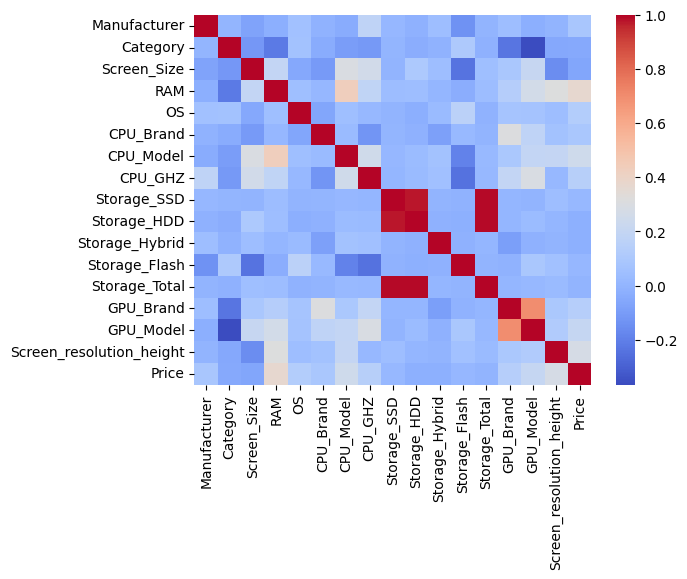

In [30]:
# Plot heatmap of correlation matrix

sns.heatmap(df5_corr_matrix, annot=False, cmap="coolwarm")

In [31]:
# One Hot Encoding for categorical columns

df_records = pd.get_dummies(
    df_records,
    columns=categorical_cols,
    drop_first=False,
)

df_records.head()

,Screen_Size,RAM,CPU_Model,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Model,...,OS_3,OS_4,OS_5,CPU_Brand_0,CPU_Brand_1,CPU_Brand_2,GPU_Brand_0,GPU_Brand_1,GPU_Brand_2,GPU_Brand_3
0,15.6,8,51,2.5,256,0,0,0,256,30,...,False,True,False,False,True,False,True,False,False,False
1,13.3,8,51,2.5,256,0,0,0,256,70,...,False,True,False,False,True,False,False,False,True,False
2,15.6,8,104,2.6,0,1024,0,0,1024,101,...,False,True,False,False,True,False,False,False,False,True
3,13.3,8,97,1.8,256,0,0,0,256,19,...,False,True,False,False,True,False,True,False,False,False
4,15.6,4,51,2.5,256,0,0,0,256,74,...,False,True,False,False,True,False,False,False,False,True


In [32]:
# Divide Original & Competitor dataframes
# in order to apply 10X weight to the compititor data

df_important = df_records.iloc[-298:]
df_main = df_records.iloc[:-298]

X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(
    df_main.drop('Price', axis=1), 
    df_main['Price'], 
    test_size=0.2, 
    random_state=274
)

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    df_important.drop('Price', axis=1), 
    df_important['Price'], 
    test_size=0.2, 
    random_state=274
)

X_train = pd.concat([X_train_main, X_train_imp])
y_train = pd.concat([y_train_main, y_train_imp])
X_test = pd.concat([X_test_main, X_test_imp])
y_test = pd.concat([y_test_main, y_test_imp])

weights = np.ones(len(y_train))
weights[-len(y_train_imp):] = 10  # Giving 5 times more importance to the last 300 instances

X_train.shape, X_test.shape, y_train.shape, y_test.shape, weights.shape


((780681, 49), (195171, 49), (780681,), (195171,), (780681,))

In [33]:
# # Create Feature set and Target set for ML
# # Split data into train and test sets
# # Scale the data

# X = df_records.drop("Price", axis=1)
# y = df_records["Price"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=274
# )

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# # Apply PolynomialFeatures to create new features

# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)

# X_train.shape, X_test.shape

In [36]:
# # Apply PCA to reduce the number of features

# pca = PCA(n_components=0.9)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# X_train.shape, X_test.shape

In [37]:
# Apply KPCA to reduce the number of features

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

X_train.shape, X_test.shape

: 

In [ ]:
# # Train the model

rf_reg = xgb.XGBRegressor()
# # rf_reg = RandomForestRegressor()
# # rf_reg = LinearRegression()

rf_reg.fit(X_train, y_train, sample_weight=weights)

In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Initializing the MLPRegressor
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=100, 
#                              activation='relu', solver='adam', random_state=274, verbose=True)

# # Training the model
# mlp_regressor.fit(X_train, y_train)

# # Predicting on the test set
# y_pred = mlp_regressor.predict(X_test)

# # Calculating the Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# r2score = r2_score(y_test, y_pred)

# print("Mean Absolute Error:", mae)
# print("R2 Score:", r2score)

Iteration 1, loss = 339773877771696.81250000
Iteration 2, loss = 189839871787457.56250000
Iteration 3, loss = 187027021786023.65625000
Iteration 4, loss = 185301885684416.87500000
Iteration 5, loss = 183894954594619.93750000
Iteration 6, loss = 182681381573248.28125000
Iteration 7, loss = 181567346866170.65625000
Iteration 8, loss = 180645346895865.46875000
Iteration 9, loss = 179871162274177.34375000
Iteration 10, loss = 179170055103143.65625000
Iteration 11, loss = 178572614631525.31250000
Iteration 12, loss = 178059891995777.81250000
Iteration 13, loss = 177579620323758.34375000
Iteration 14, loss = 177148243849632.65625000
Iteration 15, loss = 176730664183328.71875000
Iteration 16, loss = 176333532102681.46875000
Iteration 17, loss = 175938408932935.12500000
Iteration 18, loss = 175564393638988.96875000
Iteration 19, loss = 175165623926694.03125000
Iteration 20, loss = 174747967687249.15625000
Iteration 21, loss = 174287421900951.90625000
Iteration 22, loss = 173767228458023.687500

/Users/kvmmn/Desktop/data_summit/quda/qdaenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 14361430.32405872
R2 Score: 0.3983201022609114


In [ ]:
# y_pred = model.predict(X_test)
# print(f'r2_score: {r2_score(y_test, y_pred)}')

In [ ]:
# Predict the test set, and calculate MSE & R2 score

y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:,.2f}")
print(f"R2 Score: {r2:.2%}")

NameError: name 'rf_reg' is not defined

Best R<sup>2</sup> via Random Forest = 44.27% <br>
R<sup>2</sup> via Neural Nets = 40.05%